In [ ]:
!nvidia-smi
!cat /proc/cpuinfo | grep "model name"

Sun Feb 09 11:45:02 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.49       Driver Version: 457.49       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8     6W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

"cat" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

taxi_df = pd.read_csv('/content/drive/MyDrive/dataset_classification.csv')
print(taxi_df.info())
print(taxi_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413365 entries, 0 to 5413364
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   passenger_count        float64
 1   trip_distance          float64
 2   PULocationID           int64  
 3   DOLocationID           int64  
 4   fare_amount            float64
 5   extra                  float64
 6   mta_tax                float64
 7   tolls_amount           float64
 8   improvement_surcharge  float64
 9   total_amount           float64
 10  congestion_surcharge   float64
 11  trip_duration          float64
 12  fare_per_mile          float64
 13  RatecodeID_1.0         bool   
 14  RatecodeID_2.0         bool   
 15  RatecodeID_3.0         bool   
 16  RatecodeID_4.0         bool   
 17  RatecodeID_5.0         bool   
 18  RatecodeID_6.0         bool   
 19  RatecodeID_99.0        bool   
 20  VendorID_1.0           bool   
 21  VendorID_2.0           bool   
 22  day_of_week_Friday

In [ ]:
# Filtra i dati in base alla nuova colonna 'tipped'
h_tip = taxi_df[taxi_df['tipped'] == 1]
l_tip = taxi_df[taxi_df['tipped'] == 0]

print("tip: ", len(h_tip), " no_tip: ", len(l_tip))

# Bilancia il DataFrame
#balanced_df = pd.concat([l_tip, h_tip.sample(len(l_tip))])
balanced_df = pd.concat([l_tip.sample(10000), h_tip.sample(10000)])
#Daaset per la validazione
val_df = pd.concat([l_tip.sample(500000), h_tip.sample(500000)])
x_val = val_df.drop(columns=['tipped'])
y_val = val_df['tipped']
# Rimuovi la colonna 'tip_amount'
print(len(balanced_df))

# Definisci le variabili X e y
x = balanced_df.drop(columns=['tipped'])
y = balanced_df['tipped']



tip:  3919108  no_tip:  1494257
20000


In [ ]:
from sklearn.model_selection import train_test_split
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 29)
(4000, 29)
(16000,)
(4000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import GradientBoostingClassifier


# List of classifiers:
classifiers = [
    #LogisticRegression(max_iter=1000, random_state = rs, n_jobs=-1),
    DecisionTreeClassifier(random_state=rs),
    GradientBoostingClassifier(n_estimators=100, random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs,n_jobs=-1),
    #SVC(kernel='linear',probability=True,C=0.1, random_state=rs)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

Accuracy: 0.97 	 ---> DecisionTreeClassifier 
Train Accuracy: 1.00
Test Accuracy: 0.97
Validation Accuracy: 0.97


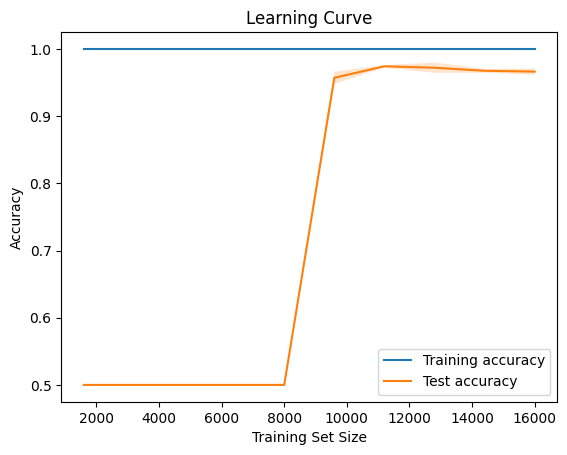

Accuracy: 0.96 	 ---> GradientBoostingClassifier 
Train Accuracy: 0.97
Test Accuracy: 0.96
Validation Accuracy: 0.96


c:\Users\marco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\marco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\marco\AppDat

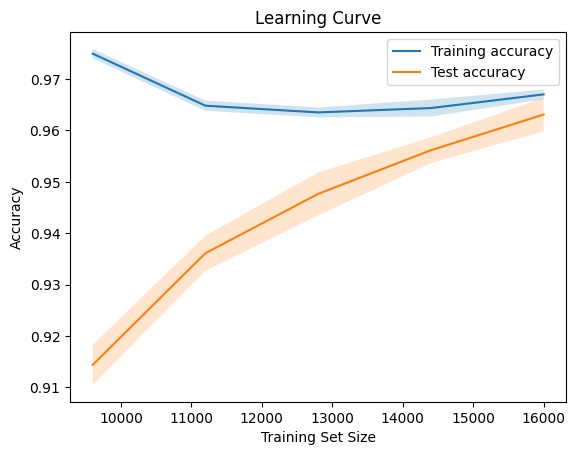

Accuracy: 0.94 	 ---> RandomForestClassifier 
Train Accuracy: 1.00
Test Accuracy: 0.94
Validation Accuracy: 0.94


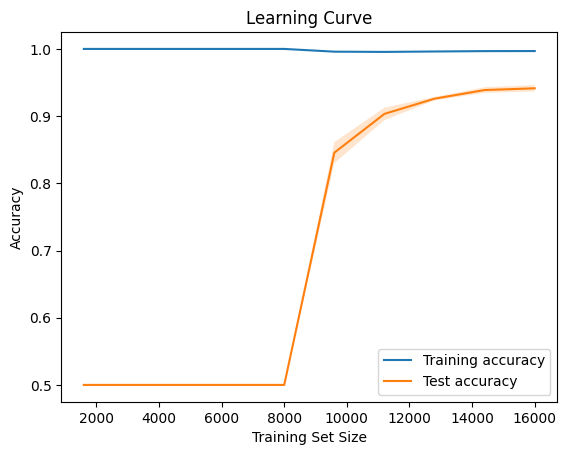

In [ ]:
for clf in classifiers:
  # Training the algorithms and results
  name = clf.__class__.__name__
  clf_name.append(name)

  #fitting and predictions
  model = clf.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  model_results[name] = y_pred

  #accuracy and log loss
  cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
  acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
  train_pred = clf.predict_proba(x_test)
  print(f'Accuracy: {acc} \t ---> {name} ')

  #confusion matrix, clasification report, roc curve
  cnfm.append(confusion_matrix(y_test, y_pred))
  clr.append(classification_report(y_test, y_pred))
  fpr, tpr, thresholds = roc_curve(y_pred, y_test)
  roc_auc.append(auc(fpr, tpr))
  roc_tpr.append(tpr)
  roc_fpr.append(fpr)


  ##################### CONTROLLO OVERFITTING #######################
  train_acc = model.score(x_train, y_train)  # Accuratezza sul training set
  test_acc = model.score(x_test, y_test)  # Accuratezza sul test set

  print(f"Train Accuracy: {train_acc:.2f}")
  print(f"Test Accuracy: {test_acc:.2f}")

  val_pred = model.predict(x_val)
  val_acc = accuracy_score(y_val, val_pred)
  print(f"Validation Accuracy: {val_acc:.2f}")


  train_sizes, train_scores, test_scores = learning_curve(
      model, x, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
  )

  # Calcola medie e deviazioni standard
  train_mean = train_scores.mean(axis=1)
  train_std = train_scores.std(axis=1)
  test_mean = test_scores.mean(axis=1)
  test_std = test_scores.std(axis=1)

  # Visualizzazione
  plt.figure()
  plt.plot(train_sizes, train_mean, label='Training accuracy')
  plt.plot(train_sizes, test_mean, label='Test accuracy')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
  plt.legend()
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title('Learning Curve')
  plt.show()



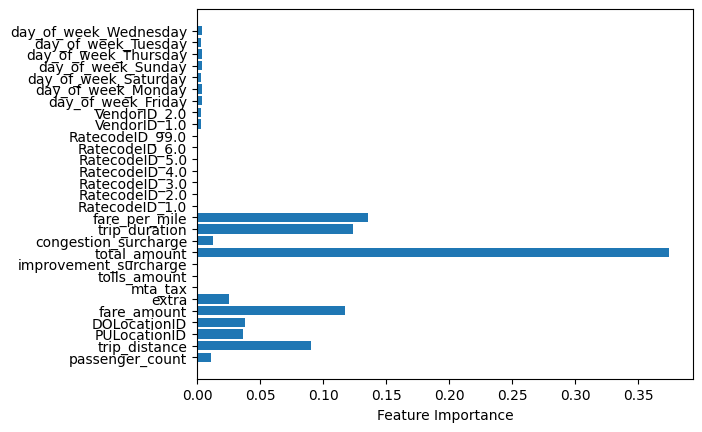

In [ ]:


rf = RandomForestClassifier()
rf.fit(x, y)
importance = rf.feature_importances_

plt.barh(x.columns, importance)
plt.xlabel("Feature Importance")
plt.show()

In [ ]:
for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

In [ ]:
# Cross validation accuracy results graph
print(cv_acc)
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})
cv_res.head()

[np.float64(0.9575625000000001), np.float64(0.9391874999999998), np.float64(0.9362499999999999)]


,CrossValMeans,CrossValerrors,Algorithm
0,0.957563,0.004086,DecisionTreeClassifier
1,0.939187,0.004721,GradientBoostingClassifier
2,0.936250,0.006629,RandomForestClassifier


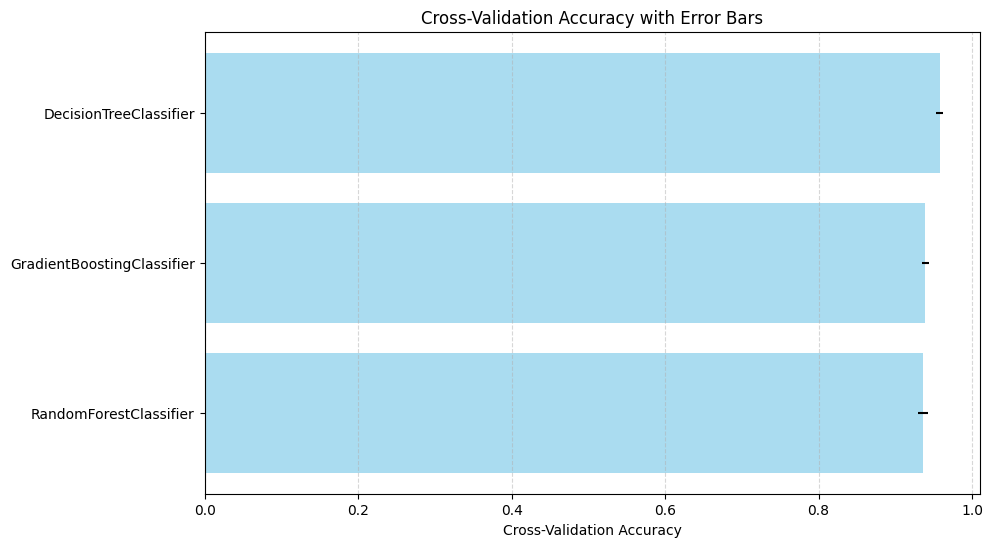

In [ ]:
# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.barh(cv_res['Algorithm'], cv_res['CrossValMeans'], xerr=cv_res['CrossValerrors'], color='skyblue', alpha=0.7)
plt.xlabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy with Error Bars')
plt.gca().invert_yaxis()  # Invertiamo l'ordine per avere il miglior algoritmo in alto
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

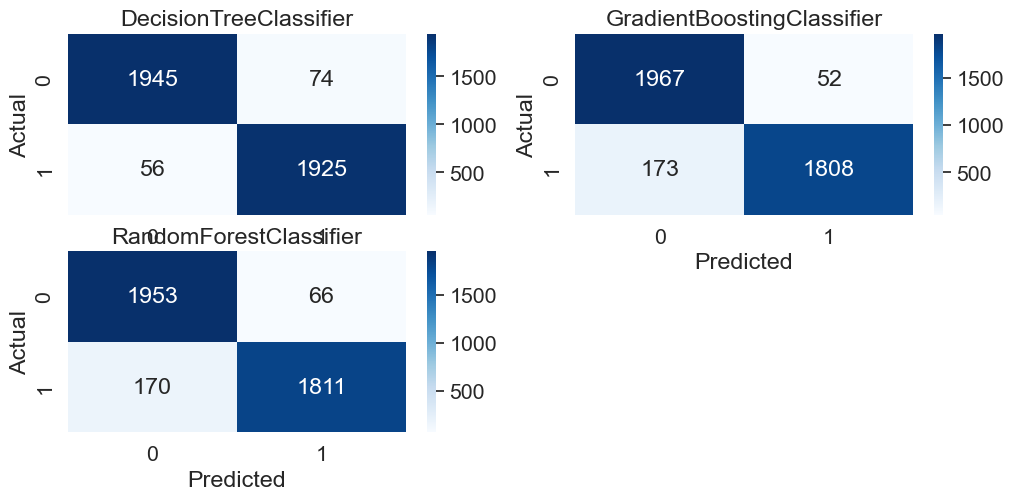

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2019
           1       0.96      0.97      0.97      1981

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2019
           1       0.97      0.91      0.94      1981

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2019
           1       0.96      0.91      0.94      1981

    accuracy                           0

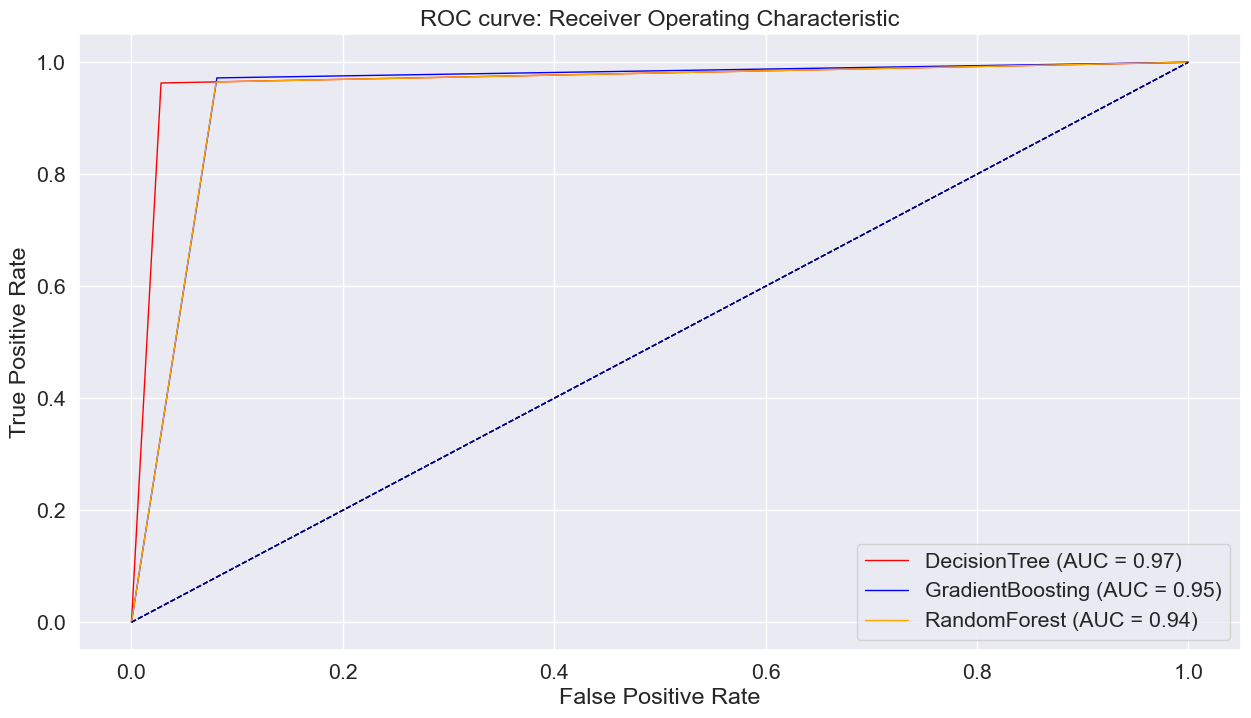

In [ ]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
from sklearn.model_selection import GridSearchCV
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.964 0.949
score with GridSearchCV:  0.947 0.982


In [ ]:

# Recreate sample data to simulate classifier results
data = {
    'DecisionTreeClassifier': model_results["LogisticRegression"],
    'GradientBoostingClassifier': model_results["LogisticRegression"],
    'RandomForestClassifier': model_results["LogisticRegression"]
}
model_results_df = pd.DataFrame(data)
# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(model_results_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between models")
plt.show()



KeyError: 'LogisticRegression'